<a href="https://colab.research.google.com/github/Syeda-Tazneen/skills_development/blob/main/DL_Fashion_Mnist_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.14.0


In [ ]:
from keras import Sequential
from keras.layers import *

In [ ]:
# https://keras.io/api/datasets/fashion_mnist/

fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(test_images.shape, test_labels.shape)

(10000, 28, 28) (10000,)


In [ ]:
"""
Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
"""

In [ ]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

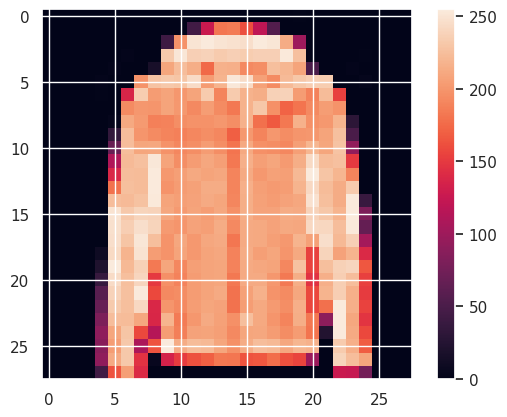

In [ ]:
plt.figure()
plt.imshow(train_images[5000]) # imshow - image show (view)
plt.colorbar()
plt.grid(True)
plt.show()

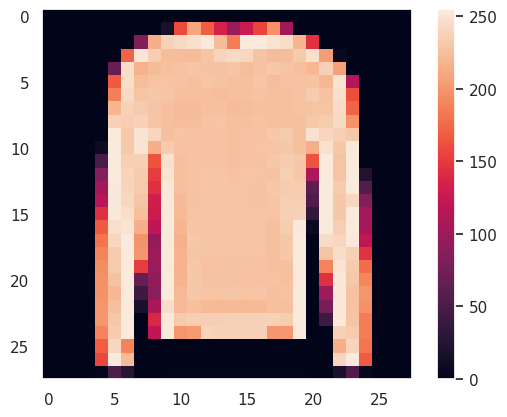

In [ ]:
plt.figure()
plt.imshow(train_images[15000])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Data Preprocessing - Normalization - it's mandatory steps
train_images = train_images/255.0
test_images = test_images/255.0

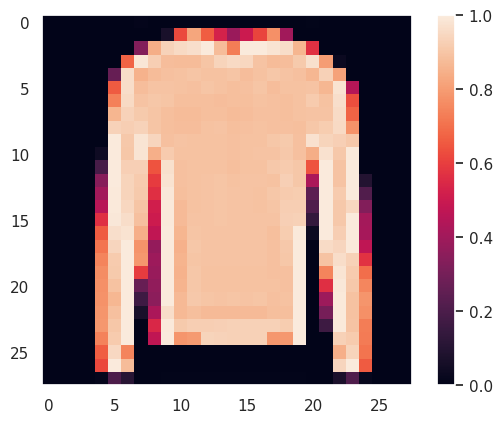

In [ ]:
plt.figure()
plt.imshow(train_images[15000])
plt.colorbar()
plt.grid(False)
plt.show()

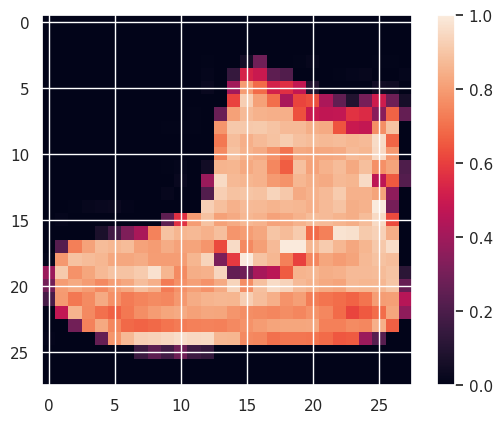

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

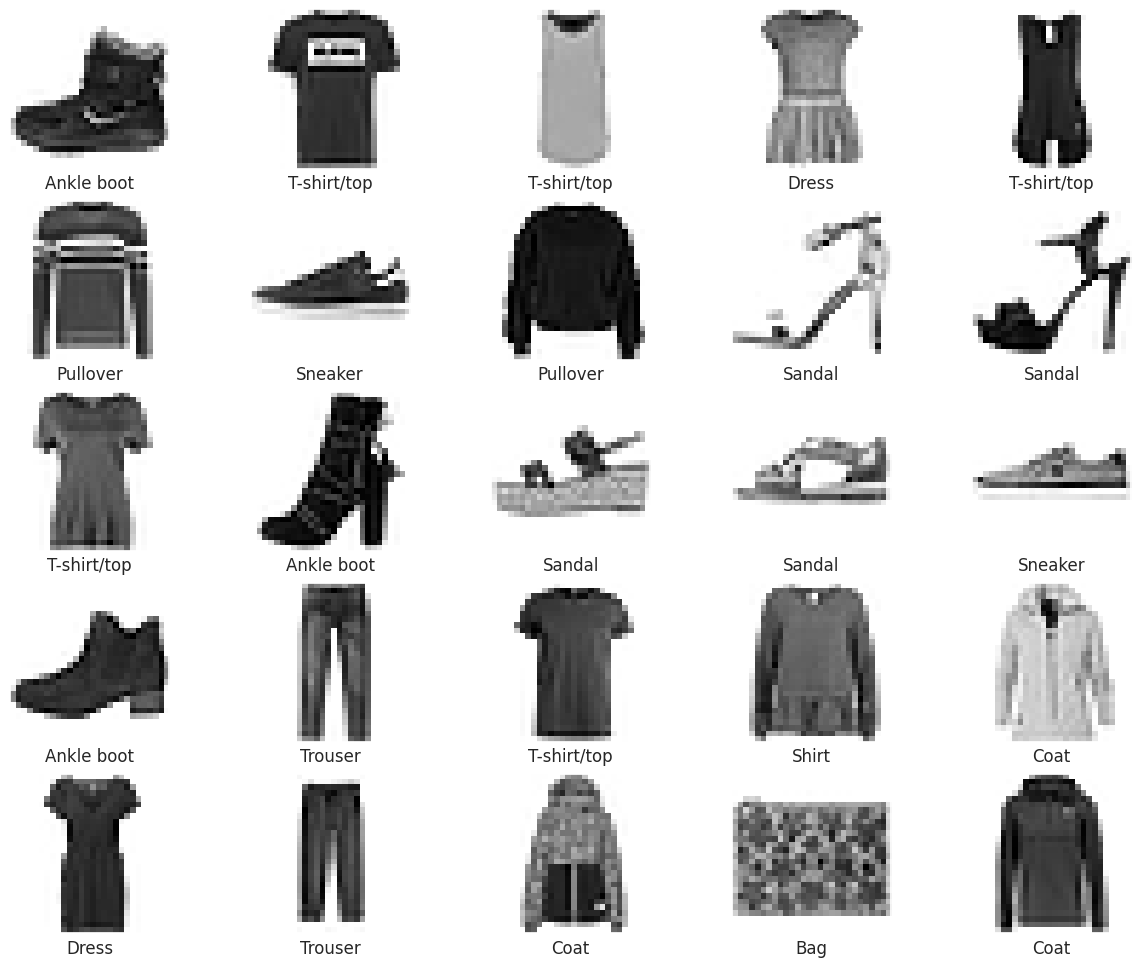

In [ ]:
# Lets see few more images

plt.figure(figsize=(15,12))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(True)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
784*128+128

100480

In [ ]:
128*10+10

1290

In [ ]:
100480 + 1290

101770

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=32, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/100
1875/1875 [==============================] - 10s 3ms/step - loss: 0.4946 - accuracy: 0.8272 - val_loss: 0.4513 - val_accuracy: 0.8395
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3733 - accuracy: 0.8649 - val_loss: 0.3767 - val_accuracy: 0.8639
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3379 - accuracy: 0.8774 - val_loss: 0.4049 - val_accuracy: 0.8526
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3120 - accuracy: 0.8855 - val_loss: 0.3639 - val_accuracy: 0.8713
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2968 - accuracy: 0.8907 - val_loss: 0.3660 - val_accuracy: 0.8714
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2785 - accuracy: 0.8964 - val_loss: 0.3387 - val_accuracy: 0.8797
Epoch 7/100
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2673 - accuracy: 0.9014 - val_loss: 0.3613 - val_a

In [ ]:
# Early Stopping

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
callback = EarlyStopping(monitor = 'val_accuracy', min_delta=0.0001,patience=10,verbose=1)

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.fit(train_images, train_labels, batch_size=32, epochs=5000, validation_data=(test_images, test_labels),
          callbacks=callback)

Epoch 1/5000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4964 - accuracy: 0.8253 - val_loss: 0.4301 - val_accuracy: 0.8482
Epoch 2/5000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3787 - accuracy: 0.8633 - val_loss: 0.3850 - val_accuracy: 0.8619
Epoch 3/5000
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3427 - accuracy: 0.8748 - val_loss: 0.4141 - val_accuracy: 0.8486
Epoch 4/5000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3182 - accuracy: 0.8837 - val_loss: 0.3545 - val_accuracy: 0.8740
Epoch 5/5000
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2992 - accuracy: 0.8907 - val_loss: 0.3596 - val_accuracy: 0.8687
Epoch 6/5000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2853 - accuracy: 0.8943 - val_loss: 0.3569 - val_accuracy: 0.8752
Epoch 7/5000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2727 - accuracy: 0.8972 - val_loss: 0.3320 -